<a href="https://colab.research.google.com/github/palakagl/AI-in-Finance/blob/main/Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Long Short Term Memory 
## Stock Price Predicton 

Import the libraries

In [1]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 6.6 MB/s 
     |████████████████████████████████| 63 kB 11.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 3.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os


import math
import yfinance as yf

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Download the data from yahoo. 

In [2]:
df=web.DataReader('TSLA', 'yahoo', start='2012-01-01', end='2022-03-28')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2022-03-22,997.859985,921.750000,930.000000,993.979980,35289500.0,993.979980
2022-03-23,1040.699951,976.400024,979.940002,999.109985,40225400.0,999.109985
2022-03-24,1024.489990,988.799988,1009.729980,1013.919983,22973600.0,1013.919983


In [3]:
df.shape

(2576, 6)

Visualize

Text(0, 0.5, 'Stock Price ($)')

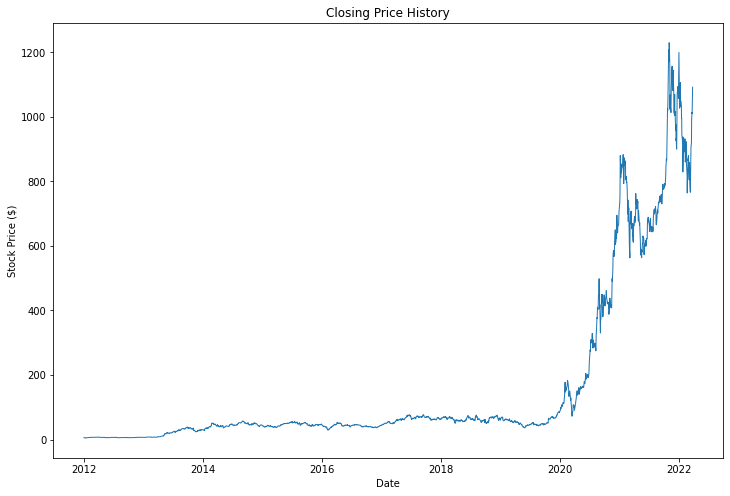

In [4]:
plt.figure(figsize=(12,8))
plt.title('Closing Price History')
plt.plot(df['Close'], lw=1)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

In [5]:
data=df.filter(['Close'])

Prepare the data

In [7]:
#convert to numpy array
#We are going to split the data into 80:20 ration for training and testing
train_pct=0.8  
dataset=data.values
train_data_len=math.ceil(len(dataset)*train_pct)

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

Time Period to predict the Stock price

In [9]:
n_period=60
#training dataset
train_data=scaled_data[0:train_data_len]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data)):
    x_train.append(train_data[i-n_period:i,0])
    y_train.append(train_data[i,0])

In [10]:
x_train[0:2]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072795,
        0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
        0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
        0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
        0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143795,
        0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
        0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
        0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
        0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
        0.00167788, 0.00195046, 0.00215775, 0.0021708 , 0.00204023,
        0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
        0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807]),
 array([0.00080303, 0.00070674, 0.00067246, 0.00072795, 0.00078834,
        0.00088791, 0.00089117, 0.        , 0.00062186, 0.00065614,
        0.00064798, 0.00062186, 0.00064961, 0.

In [34]:
y_train[0:2]

array([0.0023732 , 0.00235851])

In [12]:
#Convert numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

In [13]:
x_train.shape

(2001, 60)

In [14]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2001, 60, 1)

Training the model with Adam optimization (It is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.) 
For Loss function, we are using mean_squared_error

In [15]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train,y_train, batch_size=1, epochs=3)

Epoch 1/3
2001/2001 [==============================] - 68s 32ms/step - loss: 4.4190e-05
Epoch 2/3
2001/2001 [==============================] - 66s 33ms/step - loss: 2.3113e-05
Epoch 3/3
2001/2001 [==============================] - 70s 35ms/step - loss: 1.6403e-05


In [18]:
#Test
test_data=scaled_data[train_data_len-60:,:]
x_test=[]
y_test=dataset[train_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
               
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
x_test.shape

(515, 60, 1)

Prediction error

In [20]:
predictions=model.predict(x_test)

In [21]:
predictions=scaler.inverse_transform(predictions)

In [22]:
predictions.shape

(515, 1)

In [23]:
#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

29.416145754323423

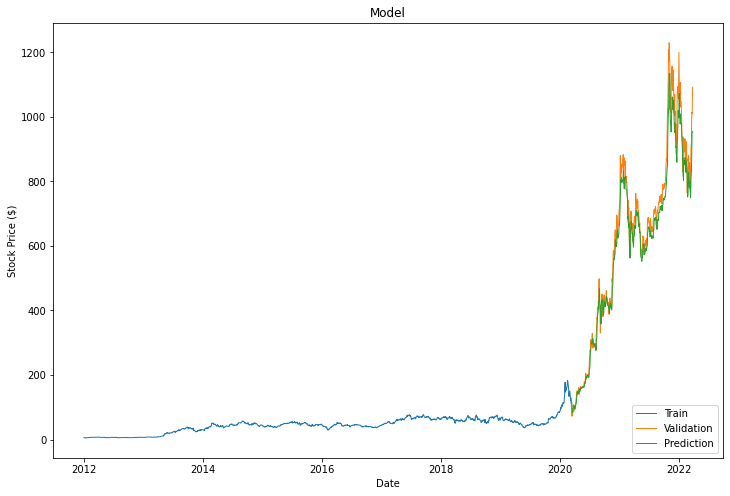

In [24]:
#plot the result
train=data[:train_data_len]
valid=data[train_data_len:]
valid=valid.assign(Predictions=predictions)
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.plot(train['Close'], lw=1)
plt.plot(valid[['Close','Predictions']], lw=1)
plt.legend(['Train','Validation', 'Prediction'],loc='lower right')
plt.show()

In [25]:
valid

,Close,Predictions
Date,,
2020-03-13,109.323997,120.393311
2020-03-16,89.014000,114.388702
2020-03-17,86.040001,102.132751
2020-03-18,72.244003,93.357117
2020-03-19,85.528000,82.841888
...,...,...
2022-03-22,993.979980,862.351196
2022-03-23,999.109985,907.700500
2022-03-24,1013.919983,933.698608


In [26]:
#get the quote
quote=web.DataReader('TSLA', 'yahoo', '2012-01-01', '2022-03-28')

In [27]:
quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2022-03-22,997.859985,921.750000,930.000000,993.979980,35289500.0,993.979980
2022-03-23,1040.699951,976.400024,979.940002,999.109985,40225400.0,999.109985
2022-03-24,1024.489990,988.799988,1009.729980,1013.919983,22973600.0,1013.919983


In [28]:
quote_df=quote.filter(['Close'])

In [29]:
quote_df

,Close
Date,
2012-01-03,5.616000
2012-01-04,5.542000
2012-01-05,5.424000
2012-01-06,5.382000
2012-01-09,5.450000
...,...
2022-03-22,993.979980
2022-03-23,999.109985
2022-03-24,1013.919983


In [30]:
#last 60 days
last_60_days=quote_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)

In [31]:
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_price=model.predict(X_test)
predicted_prce=scaler.inverse_transform(predicted_price)
print(predicted_prce)

[[993.54443]]


In [33]:
#get the quote
web.DataReader('TSLA', 'yahoo', '2022-03-28', '2022-03-28')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-28,1097.880005,1053.599976,1065.099976,1091.839966,34168700,1091.839966
